In [1]:
# Notebook to create a stock file from MolPort
import pandas as pd
import numpy as np
import json
import csv


In [2]:
# load input text file location
input_file = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/price/data/iis_properties.txt'

In [3]:
# location of output file
output_file = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/price/data/molport_in_stock.hdf5'

In [4]:
dataset = pd.read_csv(input_file, delimiter="\t")
print(dataset.head())

/data/pegasus/mokaya/miniconda3/envs/aizynth-dev/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,10,15,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
             MOLPORTID  VERIFIED_AMOUNT_MG  UNVERIFIED_AMOUNT_MG IS_SC IS_BB  \
0  MolPort-000-000-273              2500.0                2500.0   NaN   Yes   
1  MolPort-000-000-274           5000000.0             5000000.0   Yes   Yes   
2  MolPort-000-000-275             10000.0               10000.0   NaN   Yes   
3  MolPort-000-000-277            100000.0              100000.0   Yes   Yes   
4  MolPort-000-000-278             50000.0               50000.0   Yes   Yes   

                    COMPOUND_STATE PRICERANGE_1MG PRICERANGE_5MG  \
0                              NaN      100 - 250      100 - 250   
1  A CRYSTALLINE SOLID; SOLID; N/A           < 50           < 50   
2                     

In [6]:
inchis = dataset['INCHIKEY'].tolist()
prices = dataset['PRICERANGE_5MG'].tolist()

In [7]:
print(list(set(prices)))

ref_dict = {
    '< 50': 1.0,
    '50 - 100': 2.0,
    '100 - 250': 3.0,
    '250 - 500': 4.0,
    '500 - 1000': 5.0,
    '> 1000': 6.0,
}

price = [ref_dict.get(i) for i in prices]


['500 - 1000', nan, '50 - 100', '100 - 250', '250 - 500', '> 1000', '< 50']


In [17]:
price = [i if i is not None else 1.8 for i in price]

In [19]:
# convert list to dictionary
data = {'inchi_key':inchis, 'price':price}

In [20]:
# generate datafrom from dat dictionary
df = pd.DataFrame(data, columns=['inchi_key','price'])

In [21]:
#create .hdf5 and output data to file.
df = df.drop_duplicates("inchi_key")
df.to_hdf(output_file, "table")

/data/pegasus/mokaya/miniconda3/envs/aizynth-dev/lib/python3.8/site-packages/pandas/core/generic.py:2434: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['inchi_key'], dtype='object')]

  pytables.to_hdf(


In [22]:
print('File created with '+str(df.shape[0])+' molecules')

File created with 7814500 molecules


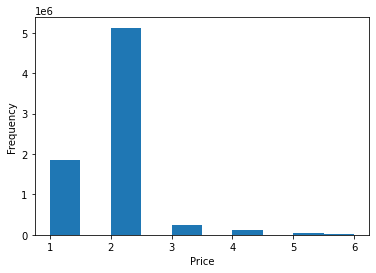

In [25]:
# plot cost distribution

p = [i for i in price if i != 1.8]

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(p)
plt.xlabel('Price')
plt.ylabel('Frequency')
#plt.ylim(0,100)
plt.savefig('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/Images/price_dist.png')
plt.show()

In [8]:
print(len(p)/len(prices))

0.6672839684086164
